In [15]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing, model_selection

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

import sklearn

In [2]:
CSV_COLUMNS =  ['age','gender','polyuria','polydipsia','sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring','itching','irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']

In [3]:
full_dataset = pd.read_csv(r'diabetes_data_upload.csv', header= 0, names = CSV_COLUMNS)

In [4]:
for colname in ['age','gender','polyuria','polydipsia','sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring','itching','irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']:
    full_dataset[colname] = pd.Categorical(full_dataset[colname])
    full_dataset[colname] = full_dataset[colname].cat.codes

In [11]:
X = full_dataset.iloc[:,0:(len(full_dataset.columns) - 1)]
Y = full_dataset.iloc[:,len(full_dataset.columns) - 1]
encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [12]:
X = np.asarray(X).astype(np.float32)

In [13]:
# baseline model
def build_dnn_model():
    # create model
    model = tf.keras.models.Sequential()
    model.add(Dense(128,activation='relu'))
    model.add(Dense(80,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
estimator = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_dnn_model, epochs=100, batch_size=10)
kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
history = model_selection.cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (history.mean()*100, history.std()*100))

Epoch 1/100
47/47 [==============================] - 1s 4ms/step - loss: 0.6479 - accuracy: 0.5934
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 0.4377 - accuracy: 0.8133
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2658 - accuracy: 0.8969
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3467 - accuracy: 0.8741
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3000 - accuracy: 0.8829
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2247 - accuracy: 0.9118
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 0.1580 - accuracy: 0.9476
Epoch 8/100
47/47 [==============================] - 0s 6ms/step - loss: 0.1961 - accuracy: 0.9063
Epoch 9/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2113 - accuracy: 0.9179
Epoch 10/100
47/47 [==============================] - 0s 4ms/step - loss: 0.1570 - accuracy: 0.9436
Epoch 11/

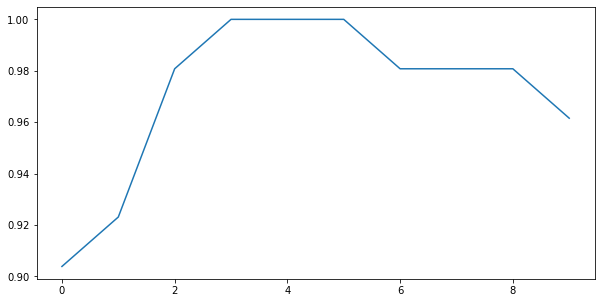

In [178]:
# Plot
import matplotlib.pyplot as plt
nrows = 1
ncols = 2
fig = plt.figure(figsize=(10, 5))

plt.plot(history)
